# TASK_5_SALES_PREDICTION_USING_PYTHON

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the sales data
df = pd.read_csv("Advertising.csv") 

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Text(0.5, 1.0, 'TV Advertising Spend vs. Sales')

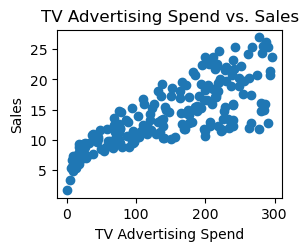

In [14]:
# Scatter plot: TV Advertising Spend vs. Sales
plt.subplot(221)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising Spend vs. Sales')

Text(0.5, 1.0, 'Radio Advertising Spend vs. Sales')

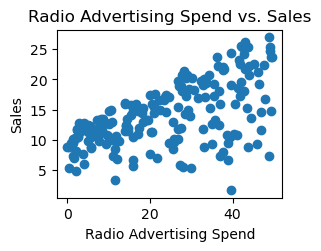

In [15]:
# Scatter plot: Radio Advertising Spend vs. Sales
plt.subplot(222)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.title('Radio Advertising Spend vs. Sales')

Text(0.5, 1.0, 'Newspaper Advertising Spend vs. Sales')

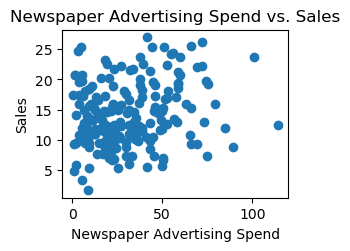

In [16]:
# Scatter plot: Newspaper Advertising Spend vs. Sales
plt.subplot(223)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.title('Newspaper Advertising Spend vs. Sales')

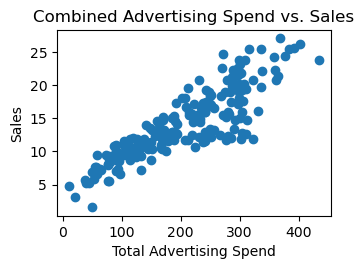

In [17]:
# Scatter plot: Combined Advertising Spend vs. Sales
plt.subplot(224)
total_spend = df['TV'] + df['Radio'] + df['Newspaper']
plt.scatter(total_spend, df['Sales'])
plt.xlabel('Total Advertising Spend')
plt.ylabel('Sales')
plt.title('Combined Advertising Spend vs. Sales')

plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns

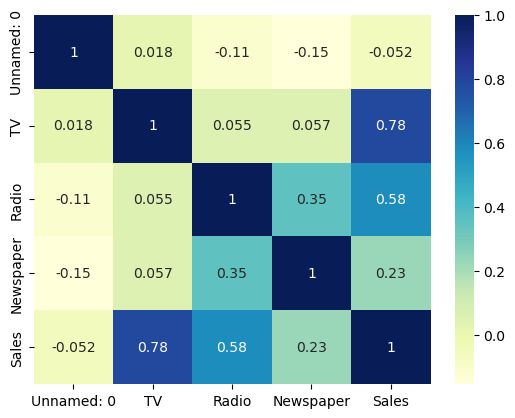

In [45]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

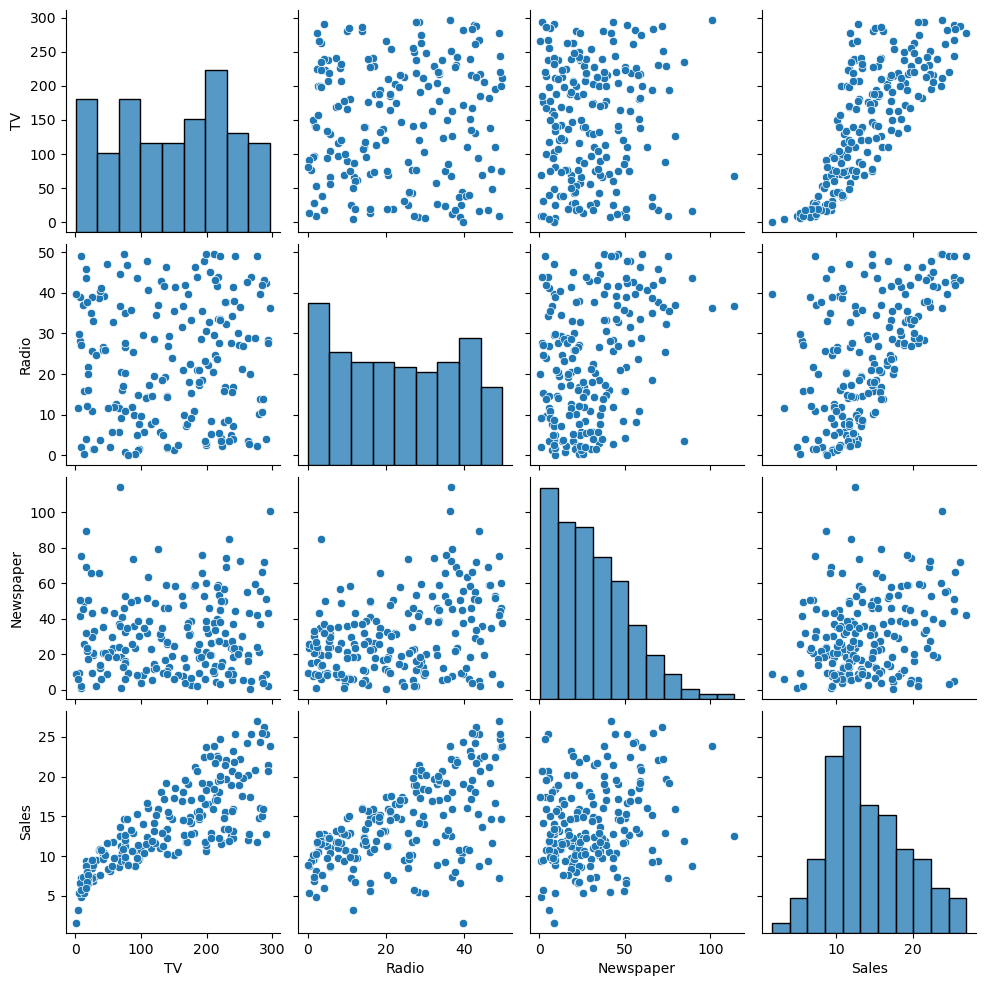

In [21]:
# Pairplot
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

In [23]:
#Model Training:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
# Split the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Create a linear regression model
model = LinearRegression()

In [28]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [30]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [32]:
y_pred.shape

(40,)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.1740973539761024
R-squared Score: 0.8994380241009121


In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [42]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Average Cross-Validation Score: 0.8871063495438435


In [43]:
# Feature importance
feature_importance = model.coef_
feature_names = X.columns
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

TV: 0.04472951746871633
Radio: 0.18919505423437644
Newspaper: 0.0027611143413671384


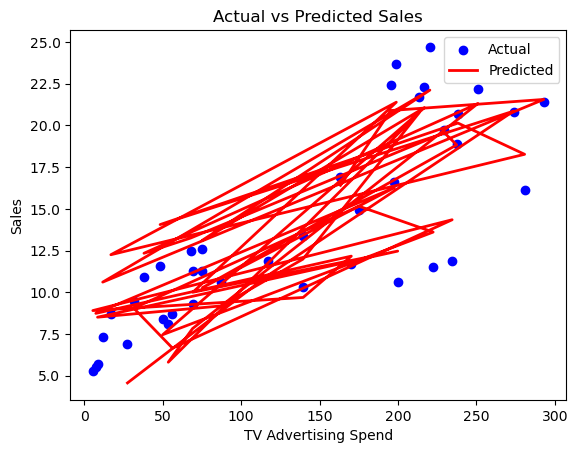

In [37]:
# Plot the predicted values against the actual values
plt.scatter(X_test['TV'], y_test, color='blue', label='Actual')
plt.plot(X_test['TV'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()